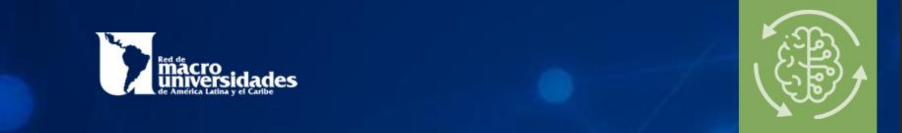

# **ESTADÍSTICA** - *LAB 2: Modelo de Regresión*
---

Israel Martinez




**Objetivo**: construir un modelo de regresión que permita predecir costos de viviendas partiendo de diferentes atributos de las mismas.

---



**Contenido**:
  *   Modelo de regresión lineal múltiple.
  *   Modelos polínomicos
---

### *Setup*

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#!pip install plotly==5.3.1
import plotly.express as px                 # Librería que permite realizar visualizaciones interactivas
                                            # Algunas funciones usadas se encuentran en versiones más actuales: desde la  4.12.0
                                            # Si tiene una versión anterior, instalar: !pip install plotly==5.3.1
# Consultar versión de plotly instalada
import plotly
print(plotly.__version__)

5.3.1


## Descripción del *dataset*
La base de datos contiene información sobre atributos utilizados para tasar propiedades residenciales en la ciudad de Ames (Iowa).

- **Período**: 2006 - 2010
- **Cantidad de variables**: 82
- **Fuente**: Oficina de Tasación de inmuebles de Ames (Iowa)
- **Información adicional**
   -  Descripción del *dataset*: https://jse.amstat.org/v19n3/decock.pdf
   -  Desripción de las variables: [codebook](https://drive.google.com/file/d/1pDkSyI8UHtLEFdjpAVNmsVqB8N6a5Pqv/view?usp=sharing)

In [ ]:
# Leemos el dataset
path = 'https://raw.githubusercontent.com/pabort/MacroEntrenam2023Estadistica/main/AmesHousing.csv'
df = pd.read_csv(path)

# Modelos de Regresión Simple

En este ejemplo vamos a construir un modelo de regresión lineal simple que permitirá predecir el precio de la vivienda
usando SOLO UNA variable expliciativa o feature:
$$\widehat{SalesPrice} = w_0 + w_1 \mbox{GrLivArea}$$

De este modo, se seguirán los siguientes pasos:
* Crear un modelo de regresión lineal usando [scikit-learn](https://scikit-learn.org/stable/).
* Usar como entrenamiento un solo atributo. Usaremos la variable `GrLivArea`, pero luego puede provar con otras variables explicativas
* Previamente, para entrenar, debereos  dividir el conjunto de datos en entrenamiento y evaluación. Esto será posible mediante la función [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) (ses sugerimos que revise la documentación y los argumentos de la función).
* La métrica para evaluar el modelo de regresión, puede ser cualquiera de los analizados en la clase: por ejemplo, el error cuadrático medio (`MSE`)
* Como se trata de un modelo de rregresión simple, podemos graficar facilmente para visualizar la relación.


MSE: 2715839117.3248672


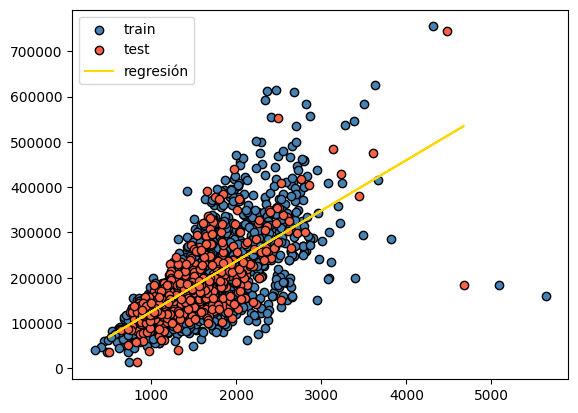

In [ ]:
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split  # permite separar el conjunto de datos
from sklearn.linear_model import LinearRegression     # Permitirá entrenar el modelo de regresión lineal
from sklearn.metrics import mean_squared_error        # permitirá calcular laas métricas para evaluar el modelo


sub_data = df[['GrLivArea','SalePrice']]
sub_data = sub_data.dropna()

### Elegir una feature y separar de la variable precio
### Crear X (dado el dataframe y la feature elegida)
features = ['GrLivArea']
X = sub_data[features]
y = sub_data['SalePrice']

# Generar el split train/test usando la función train_test_split:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=1234)


# Instanciar la clase que provee la regresión lineal
lm = LinearRegression()
# ajustar el modelo
lm.fit(X_train, y_train)

# Generar la predicción
y_pred = lm.predict(X_test)

# Usar alguna métrica como el error cuadrático medio (MSE) u otra e imprimir el error
print('MSE:', mean_squared_error(y_test, y_pred))

# Plotear los puntos de entrenamiento, puntos de test y recta de regresión
plt.scatter(X_train, y_train, facecolor="steelblue", edgecolor="k", label="train")
plt.scatter(X_test, y_test, facecolor="tomato", edgecolor="k", label="test")
plt.plot(X_test, y_pred, color="gold", label="regresión")
plt.legend()
plt.show()

# Modelos de Regresión Múltiple

Consideraremos un modelo de regresión con el objetivo de predecir el valor de propidades a partir de distintos atributos del dataset.

Tomaremos en cuenta algunas variables determinantes, partiendo de un modelo de regresión lineal, sin considerar interacción entre las variables

$$\widehat{SalesPrice} = w_0 + w_1 \mbox{OverallQual} + w_2 \mbox{OverallCond} + w_3 \mbox{YearBuilt} + w_4 \mbox{YearRemodAdd} + w_5 \mbox{1stFlrSF} + w_6 \mbox{TotRmsAbvGrd} + w_7 \mbox{FullBath} + w_8 \mbox{LotFrontage} + w \mbox{LotArea}$$

No entraremos por ahora en los criterios de selección de variables. [completar con variable a usar]

Lo primero que haremos es fenerar un "subdataset" con las variables o atributos de interés.

In [ ]:
# Seleccionamos las variables a considerar y eliminamos los messing's
sub_data = df[['OverallQual','OverallCond','YearBuilt','YearRemod/Add','1stFlrSF','TotRmsAbvGrd','FullBath','LotFrontage','LotArea','SalePrice']]
sub_data = sub_data.dropna()

# Dividimos el dataset entre variables predictoras
X = sub_data[['OverallQual','OverallCond','YearBuilt','YearRemod/Add',
              '1stFlrSF','TotRmsAbvGrd','FullBath','LotFrontage','LotArea']]  # Variables predictoras
y = sub_data['SalePrice']                                                     # Variable dependiente (respuesta)

Dividimos el dataset para tener una muestra de entrenamiento y otra para el testing (recordemos que tenemos separadas las avriables predictoras y la dependiente).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

A continuación vemos la dimensión de cada dataset

In [ ]:
print('X_train: ', X_train.shape)
print('X_test: ',  X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (1952, 9)
X_test:  (488, 9)
y_train:  (1952,)
y_test:  (488,)


Estimamos el modelo de regresión lineal que definimos.

In [ ]:
from sklearn import linear_model
# Instanciamos una clase LinearRegression
lm = linear_model.LinearRegression()

# Entrenamos el modelo con el train dataset
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Si bien el objetivo de los modelos que entrenaremos es predictivo, mediante la función `summary` del módulo `stats` de la librería `regressors` obtenemos algunas estadísticas básicas asociados a los parámetros $w$ del modelo estimado.

¿Qué puede deducirse a partir de estos resultados?

In [ ]:
#!pip install regressors
from regressors import stats    # nos permite obtener algunas test estadísticos básicos del modelo (summary)

In [ ]:
stats.summary(lm, X_train, y_train, X_train.columns)

Residuals:
       Min          1Q       Median           3Q          Max
-76686.735  127175.573  171609.8961  224806.5793  603803.5611


Coefficients:
                   Estimate     Std. Error  t value   p value
_intercept    -1.304559e+06  111215.618062 -11.7300  0.000000
OverallQual    2.923481e+04     801.883797  36.4577  0.000000
OverallCond    3.593643e+03     976.484046   3.6802  0.000239
YearBuilt      3.787675e+02      27.274186  13.8874  0.000000
YearRemod/Add  2.087851e+02      26.723414   7.8128  0.000000
1stFlrSF       4.619542e+01       2.451626  18.8428  0.000000
TotRmsAbvGrd   8.358010e+03     694.017602  12.0429  0.000000
FullBath       9.963491e+02    2174.754396   0.4581  0.646901
LotFrontage    1.073711e+02      46.592830   2.3045  0.021302
LotArea        1.026744e+00       0.096790  10.6080  0.000000
---
R-squared:  0.76994,    Adjusted R-squared:  0.76887
F-statistic: 722.12 on 9 features


Calculamos algunas métricas usando el modelo entrenado pero sobre el conjunto de test.

In [ ]:
import numpy as np
from sklearn import metrics
predictions = lm.predict(X_test)  # predicción en el test dataset
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 27292.771908962335
MSE: 1758672355.3802454
RMSE: 41936.527698180325


## Análisis de residuos

Primero analizaremos la linealidad, ya que es un supuesto básico que estamos considerando. El análisis de los residuos nos permitirá encontrar formas de mejorar el modelo

In [ ]:
def residplot(model,X,y,**kwargs):
    '''
    Esta función nos permitirá calcular los errores de estimación
    Inputs:
        model = modelo entrenado
        X: variables predictoras (dataframe)
        y: vaiable de respuesta (dataframe)
        kwargs: argumentos residuales deseaborn.residplot
    Output:
        diagrama de dispersión: residuos vs. valores predichos
    '''
    vals = {'Residuos': y-model.predict(X), 'Predicciones': model.predict(X)}  # Agregar residuos estandarizados
    resdf = pd.DataFrame(vals)
    ax = sns.residplot(y='Residuos',x='Predicciones', data=resdf, **kwargs)
    return ax


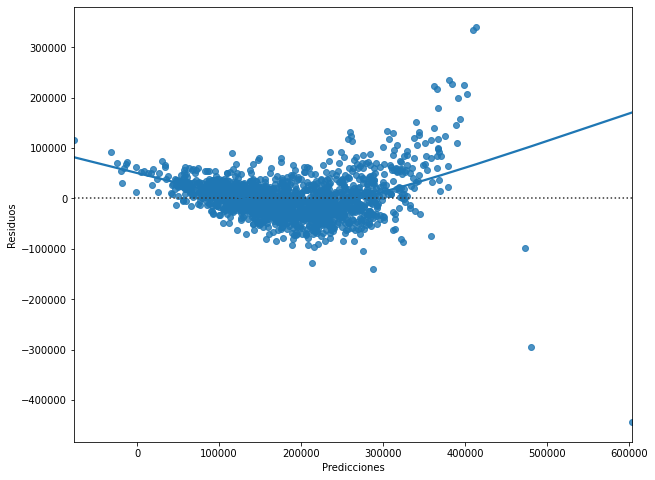

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
residplot(lm, X_train, y_train, lowess = True)
plt.show()

¿Cuáles son las dos principales características que se observan en el plot anterior?

- Forma de $U$.
- La dispersión no es constante (heterocedasticidad): incrementa la dispersión con los valores de las predicciones.

Estimaremos un modelo polinomial con $M = 2$, considerando "todas las variables contra todas".

¿Cuántos $w_i$'s tendremos que estimar?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_lm = make_pipeline(PolynomialFeatures(2,include_bias=False),
                           LinearRegression())
poly_lm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
# Guardamos dos elementos (steps) de la salida de de make_pipeline
inpipepf = poly_lm.named_steps['polynomialfeatures']  # variables empleadas en el modelo
inpipelm = poly_lm.named_steps['linearregression']    # modelo entrenado

In [ ]:
# inpipepf.n_output_features_  # Consultar cantidad de parámetros estimados

Obtenemos un summary del modelo estimado

In [ ]:
stats.summary(inpipelm, inpipepf.transform(X_train), y_train, inpipepf.get_feature_names(X.columns))

Residuals:
        Min           1Q       Median           3Q          Max
 23757.9927  125248.7214  159408.4498  215466.7417  546425.7726


Coefficients:
                                Estimate    Std. Error  t value   p value
_intercept                 -2.975717e+07  1.187208e+07  -2.5065  0.012275
OverallQual                -7.987806e+04  9.763445e+04  -0.8181  0.413381
OverallCond                 1.481555e+05  9.306128e+04   1.5920  0.111542
YearBuilt                   6.744654e+03  3.646562e+03   1.8496  0.064523
YearRemod/Add               2.272108e+04  3.574894e+03   6.3557  0.000000
1stFlrSF                   -2.261552e+02  3.171977e+02  -0.7130  0.475944
TotRmsAbvGrd                8.832302e+04  7.366086e+04   1.1990  0.230654
FullBath                   -6.676212e+05  2.176343e+05  -3.0676  0.002187
LotFrontage                 5.057795e+03  5.667020e+03   0.8925  0.372237
LotArea                     2.715403e+01  1.350264e+01   2.0110  0.044461
OverallQual^2               3.1

*Métricas de error sobre el modelo entrenado*

In [ ]:
predictions = poly_lm.predict(X_test)

# Si hay predicciones negativas, las igualamos a 0
for i,num in enumerate(predictions):
    if num<0:
        predictions[i] = 0

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(y_test, predictions)))

MAE: 23313.894648127396
MSE: 2016660013.4577262
RMSE: 44907.23787384085
RMSLE: 0.18841807336137492


Veamos los residuos del modelo entrenado



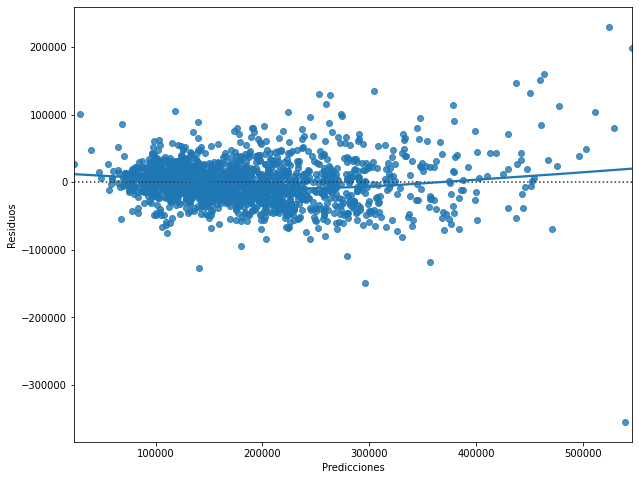

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
residplot(inpipelm,inpipepf.transform(X_train), y_train, lowess = True)
plt.show()

### Selección de features

Veamos si podemos mejorar la performance del modelo anterior eliminando algunas de los parámetros estimados analizando las métricas de error. En este caso, será de gran utilidad la función [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).
En este caso graficaremos los valores de la métrica utilizada para los distintas variables consideradas

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Litas donde guardaremos las métricas de error y variables
RMSLEs = []
Ks = []

for k in range(1,54):
    poly_lm_freg = make_pipeline(PolynomialFeatures(2,include_bias=False), SelectKBest(f_regression, k),
                               LinearRegression())
    poly_lm_freg.fit(X_train,y_train)
    predictions = poly_lm_freg.predict(X_test)
    for i,num in enumerate(predictions):
        if num<0:
            predictions[i] = 0
    RMSLEs.append(np.sqrt(metrics.mean_squared_log_error(y_test, predictions)))
    Ks.append(k)

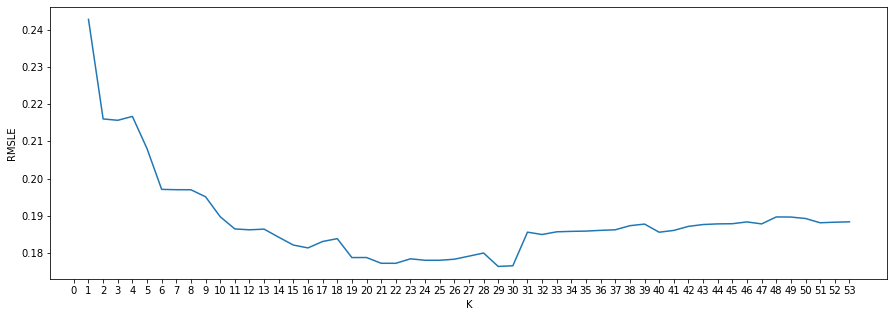

In [ ]:
fig, ax = plt.subplots()
ax.plot(Ks,RMSLEs)
fig.set_size_inches(15,5)
ax.set_xlabel('K')
ax.set_ylabel('RMSLE')
b = ax.set_xticks(range(54))
del b

Elegimos el mejor de los modelos

In [ ]:
poly_lm_freg = make_pipeline(PolynomialFeatures(2,include_bias=False), SelectKBest(f_regression,29),
                               LinearRegression())
poly_lm_freg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('selectkbest',
                 SelectKBest(k=29,
                             score_func=<function f_regression at 0x7f0ee7b05170>)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
predictions = poly_lm_freg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(y_test, predictions)))

MAE: 22787.397666786794
MSE: 1098125803.1260254
RMSE: 33137.98127716933
RMSLE: 0.17640691092435767


In [ ]:
inpipepf = poly_lm_freg.named_steps['polynomialfeatures']  # variables empleadas en el modelo
inpipesk = poly_lm_freg.named_steps['selectkbest']         # variables de modelo elegido
inpipelm = poly_lm_freg.named_steps['linearregression']    # modelo entrenado

In [ ]:

from itertools import compress
# La función compress tomar el nombre de las variables con las que efectivamente nos quedamos en el modelo
# inpipesk.get_support(): devuelve True o False de acuerdo a si se queda en el modelo o no
Xlabels = list(compress(inpipepf.get_feature_names(X.columns), inpipesk.get_support()))

In [ ]:
stats.summary(inpipelm, inpipesk.transform((inpipepf.transform(X_train))), y_train, Xlabels)


Residuals:
       Min           1Q       Median           3Q       Max
 60017.868  123919.8977  158373.0075  216597.9567  561619.5


Coefficients:
                               Estimate    Std. Error  t value   p value
_intercept                -1.580640e+07  1.202203e+07  -1.3148  0.188736
OverallQual               -8.258799e+04  1.001798e+05  -0.8244  0.409814
YearBuilt                  2.268056e+03  3.687494e+03   0.6151  0.538582
YearRemod/Add              1.371504e+04  3.598616e+03   3.8112  0.000143
1stFlrSF                   3.718655e+02  2.942101e+02   1.2639  0.206401
FullBath                  -7.048198e+05  2.077436e+05  -3.3927  0.000706
OverallQual^2              3.275215e+03  4.156374e+02   7.8800  0.000000
OverallQual OverallCond   -4.660398e+02  4.798166e+02  -0.9713  0.331526
OverallQual YearBuilt      8.626225e+01  2.019125e+01   4.2723  0.000020
OverallQual YearRemod/Add -6.646404e+01  1.981587e+01  -3.3541  0.000812
OverallQual 1stFlrSF       1.779096e+01  1.349325e

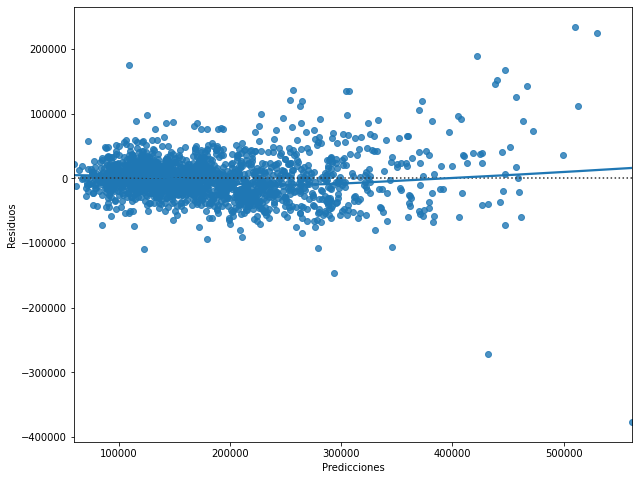

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
residplot(inpipelm,inpipesk.transform((inpipepf.transform(X_train))),y_train, lowess = True)
plt.show()